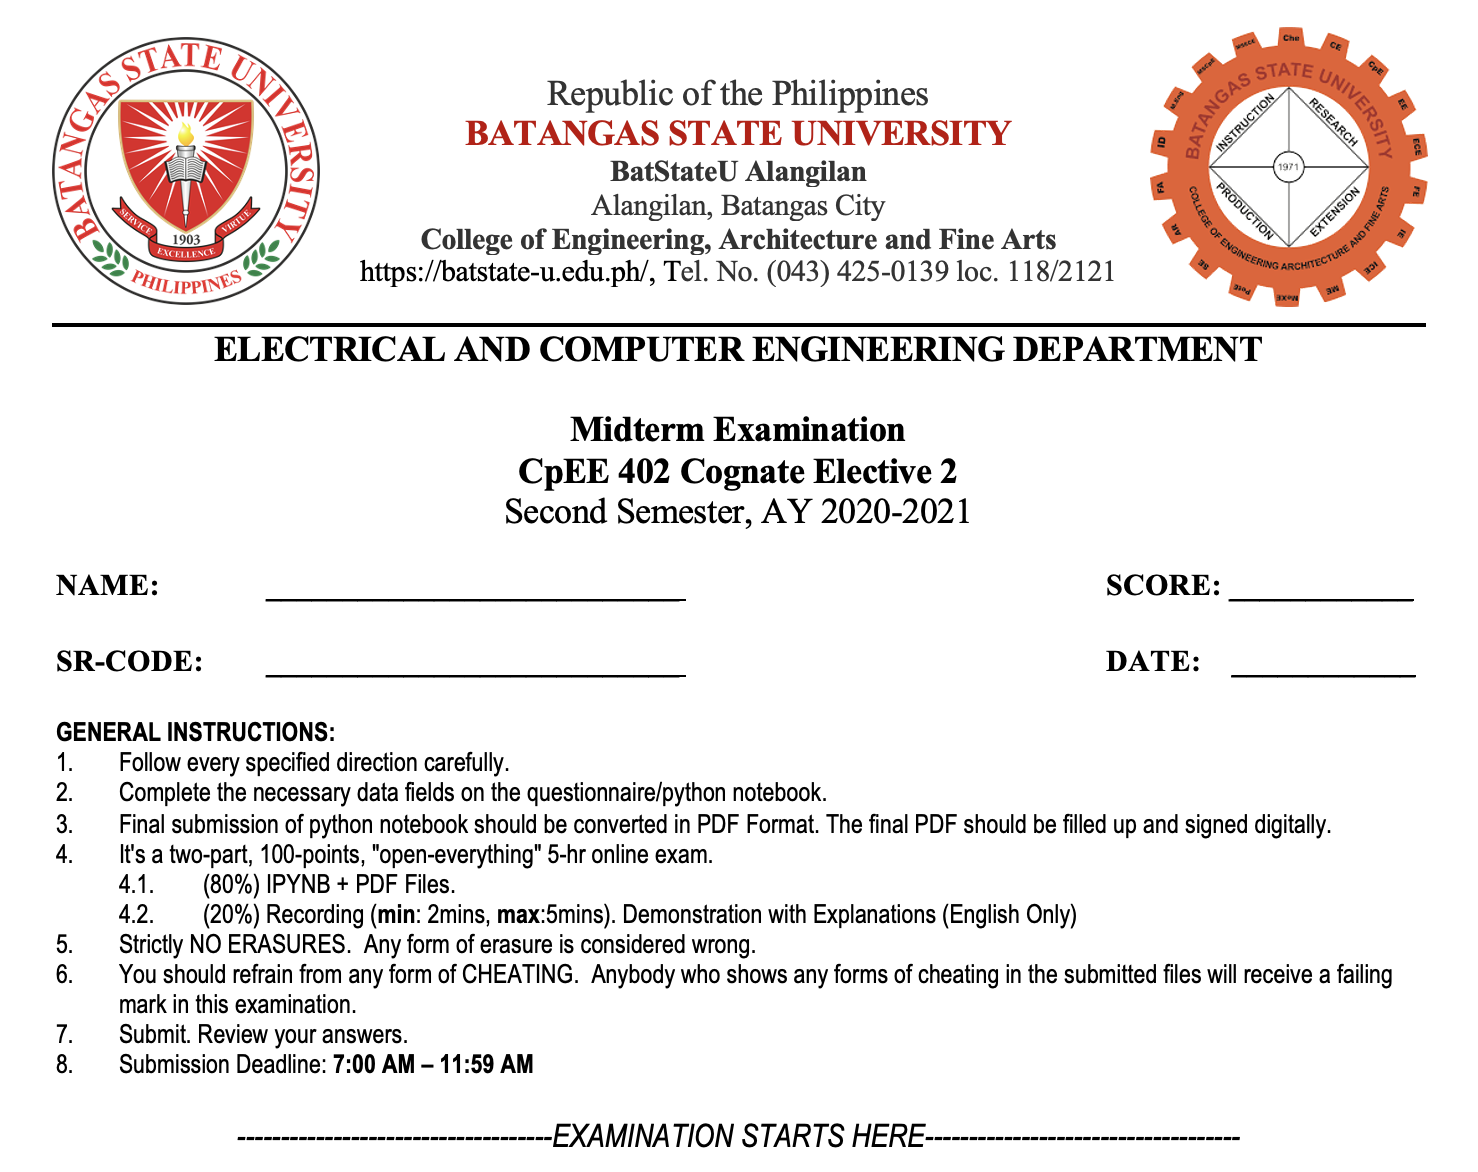

## I. PROBLEM STATEMENT

Define and Explain the regression problem you want to solve. (Min of 100, Max of 300 Words)

Coronaviruses are a large family of viruses that can cause a variety of illnesses, ranging from the common cold to more serious infections like those caused by the Coronavirus associated with Severe Acute Respiratory Syndrome (SARS-CoV). However, we have recently been exposed to a novel coronavirus. The majority of us are unsure if COVID-19 and SARS-Cov are the same virus. No, that is not the case. Both the COVID-19 virus and the SARS-CoV are coronaviruses that are genetically related, but they are not the same. SARS is more lethal and deadly than COVID-19, but it is less contagious.
<p>
    Furthermore, we want to implement a regression problem involving the distribution of confirmed cases versus the death figure. We want to see if the theories about SARS being more lethal and deadly than COVID-19 are correct.

## II. DATASET DESCRIPTION

Look for Public Datasets. Define and Explain the dataset you will use for regression problem you want to solve. Include the link of where the public dataset downloaded (Min of 100, Max of 300 Words)

The Public Dataset to be used for the analysis would be the SARS 2003 Outbreak Dataset (https://www.kaggle.com/imdevskp/sars-outbreak-2003-complete-dataset). SARS is a zoonotic viral respiratory disease caused by the SARS coronavirus (SARS-CoV). Its contexts include records from a SARS outbreak in southern China that occurred between November 2002 and July 2003. The dataset details the total number of SARS cases, deaths, ranging from March to July 2003, and all the world, during this time period. Thus, there were no further reported cases of the disease after 2004, but since the world is facing a global pandemic, it is still crucial to look into this matter.

## III. EXPLORATORY DATA ANALYSIS (EDA)

### 1. Read the data

In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno

%matplotlib inline
import seaborn as sns

In [5]:
data = pd.read_csv('sars_2003_complete_dataset_clean.csv')

### 2. Get an overview of the dataset:

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2538 entries, 0 to 2537
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Unnamed: 0                    2538 non-null   int64 
 1   Unnamed: 0.1                  2538 non-null   int64 
 2   Date                          2538 non-null   object
 3   Country                       2538 non-null   object
 4   Cumulative number of case(s)  2538 non-null   int64 
 5   Number of deaths              2538 non-null   int64 
 6   Number recovered              2538 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 138.9+ KB


### 3. Print the first five and last five rows of the dataset

In [7]:
data

,Unnamed: 0,Unnamed: 0.1,Date,Country,Cumulative number of case(s),Number of deaths,Number recovered
0,0,0,2003-03-17,Germany,1,0,0
1,1,1,2003-03-17,Canada,8,2,0
2,2,2,2003-03-17,Singapore,20,0,0
3,3,3,2003-03-17,"Hong Kong SAR, China",95,1,0
4,4,4,2003-03-17,Switzerland,2,0,0
...,...,...,...,...,...,...,...
2533,2533,2533,2003-07-11,Switzerland,1,0,1
2534,2534,2534,2003-07-11,Thailand,9,2,7
2535,2535,2535,2003-07-11,United Kingdom,4,0,4
2536,2536,2536,2003-07-11,United States,75,0,67


### 4. Find the summary statistics of the dataset

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,2538.0,1268.500000,732.801815,0.0,634.25,1268.5,1902.75,2537.0
Unnamed: 0.1,2538.0,1268.500000,732.801815,0.0,634.25,1268.5,1902.75,2537.0
Cumulative number of case(s),2538.0,219.211978,825.024564,0.0,1.00,3.0,14.75,5329.0
Number of deaths,2538.0,17.812845,61.425627,0.0,0.00,0.0,2.00,348.0
Number recovered,2538.0,134.678487,581.595350,0.0,1.00,2.0,9.00,4941.0


### 5. Find the total count and total percentage of missing values in each column of the DataFrame and display them for columns having at least one null value, in descending order of missing percentages.

In [9]:
mask = data.isnull()
total = mask.sum()
percent = 100*mask.mean()

missing_data = pd.concat([total, percent], axis=1,join='outer',
                         keys=['count_missing', 'perc_missing'])
missing_data.sort_values(by='perc_missing', ascending=False, inplace=True)
missing_data

,count_missing,perc_missing
Unnamed: 0,0,0.0
Unnamed: 0.1,0,0.0
Date,0,0.0
Country,0,0.0
Cumulative number of case(s),0,0.0
Number of deaths,0,0.0
Number recovered,0,0.0


### 6. Plot the nullity matrix and nullity correlation heatmap.

ValueError: zero-size array to reduction operation minimum which has no identity

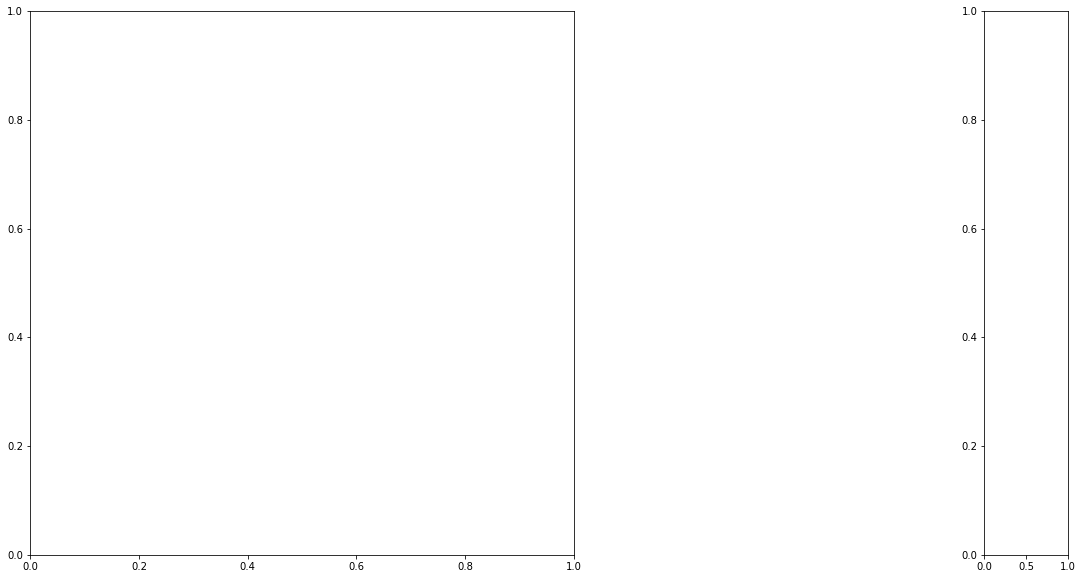

In [10]:
nullable_columns = data.columns[mask.any()].tolist()
msno.matrix(data[nullable_columns].sample(500))
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/matrix.py:311: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/opt/anaconda3/lib/python3.8/site-packages/seaborn/matrix.py:311: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


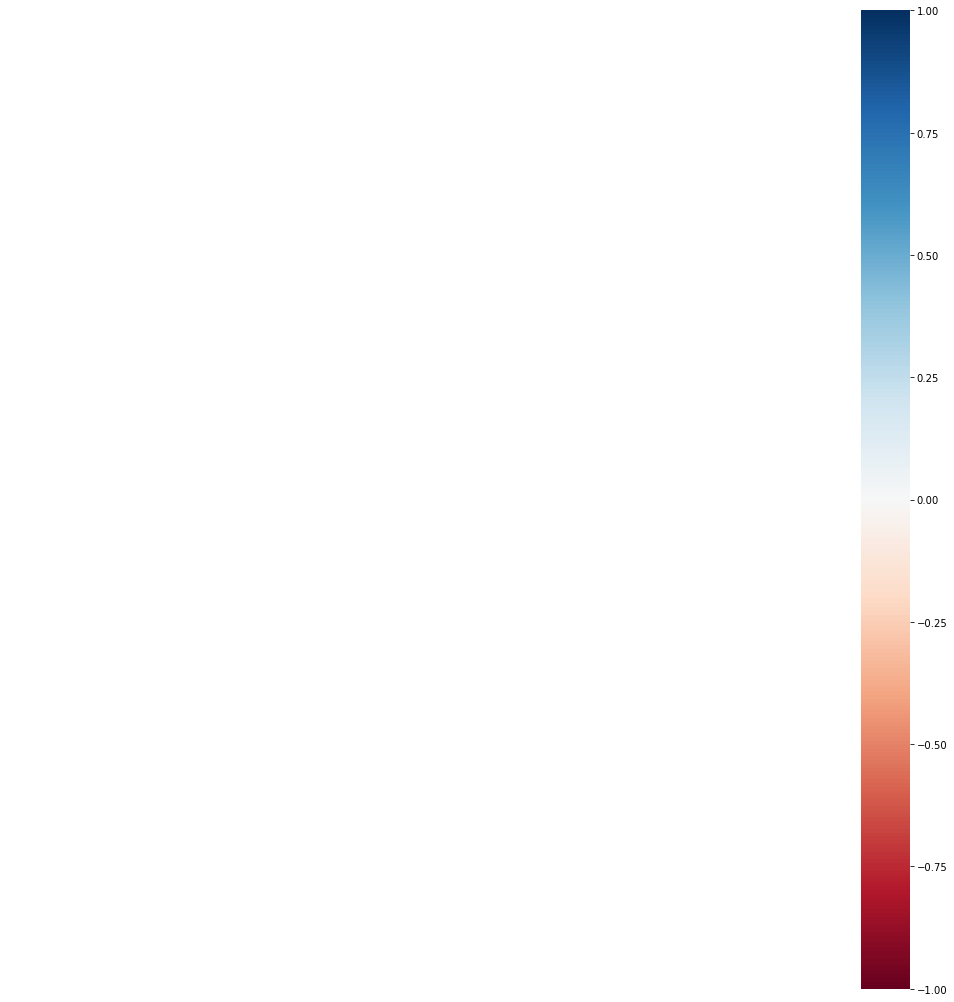

In [11]:
msno.heatmap(data[nullable_columns], figsize=(18,18))
plt.show()

### 7. Delete the columns having more than 80% of values missing.

In [12]:
missing_data

,count_missing,perc_missing
Unnamed: 0,0,0.0
Unnamed: 0.1,0,0.0
Date,0,0.0
Country,0,0.0
Cumulative number of case(s),0,0.0
Number of deaths,0,0.0
Number recovered,0,0.0


### 8. Impute null values based from the Summary Statistics. Any statistical values can be used for imputation

In [13]:
data.Date = data.Date.apply(pd.to_datetime)

In [14]:
data['Day_of_the_year'] = data.Date.dt.strftime("%d").astype(int) 
data['Week_of_the_year'] = data.Date.dt.strftime("%w").astype(int)
data['Month_of_the_year'] = data.Date.dt.strftime("%m").astype(int)
data.drop(['Date'], inplace = True, axis = 1)

In [15]:
obj_type_features = data.select_dtypes(include = "object").columns
print (obj_type_features)
print (data.Country) 

Index(['Country'], dtype='object')
0                    Germany
1                     Canada
2                  Singapore
3       Hong Kong SAR, China
4                Switzerland
                ...         
2533             Switzerland
2534                Thailand
2535          United Kingdom
2536           United States
2537                Viet Nam
Name: Country, Length: 2538, dtype: object


In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data.Country = le.fit_transform(data.Country)
print (data.Country)

0        9
1        4
2       26
3       10
4       31
        ..
2533    31
2534    33
2535    34
2536    35
2537    36
Name: Country, Length: 2538, dtype: int64


### 9. Export the Cleaned Dataset.

In [17]:
data.to_csv('sars_2003_complete_dataset_cleaned.csv')

## IV.  AI MODELLING - APPLIED REGRESSION ANALYSIS (ARA)

### 1. Import the required dependencies.

In [18]:
## Insert your code here:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

### 2. Read the cleaned data.

In [19]:
df = pd.read_csv("sars_2003_complete_dataset_cleaned.csv")

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2538 entries, 0 to 2537
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Unnamed: 0                    2538 non-null   int64
 1   Unnamed: 0.1                  2538 non-null   int64
 2   Unnamed: 0.1.1                2538 non-null   int64
 3   Country                       2538 non-null   int64
 4   Cumulative number of case(s)  2538 non-null   int64
 5   Number of deaths              2538 non-null   int64
 6   Number recovered              2538 non-null   int64
 7   Day_of_the_year               2538 non-null   int64
 8   Week_of_the_year              2538 non-null   int64
 9   Month_of_the_year             2538 non-null   int64
dtypes: int64(10)
memory usage: 198.4 KB


### 3. Construct a multiple linear regression model.

In [21]:
df = df.rename(columns={'Cumulative number of case(s)': 'Cumulative_Cases', 'Number of deaths': 'Death_Count', 
                      'Number recovered': 'Recovered_Count'})

Text(0, 0.5, 'Deaths occured')

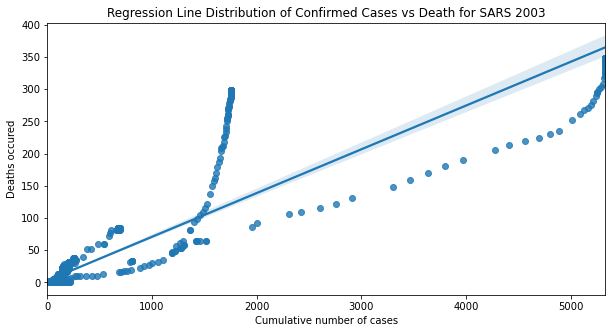

In [22]:
plt.figure(figsize = [10,5])
plt.title('Regression Line Distribution of Confirmed Cases vs Death for SARS 2003')

sns.regplot(x = df['Cumulative_Cases'], y=df['Death_Count'])

plt.xlabel('Cumulative number of cases')
plt.ylabel("Deaths occured")

### 4. Compute the performance of the model in terms of the R-squared value. <font color=red>Target Score: 80% and Above </font>.

In [23]:
X = df.drop(['Death_Count'], axis = 1)
y = df['Death_Count']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [24]:
reg = LinearRegression()
reg.fit(X_train, y_train)
reg.score(X_train, y_train)

0.8708469253709062

In [25]:
y_pred = reg.predict(X_test)
print("r2 score:", metrics.r2_score(y_test, y_pred))

r2 score: 0.8065234022321954


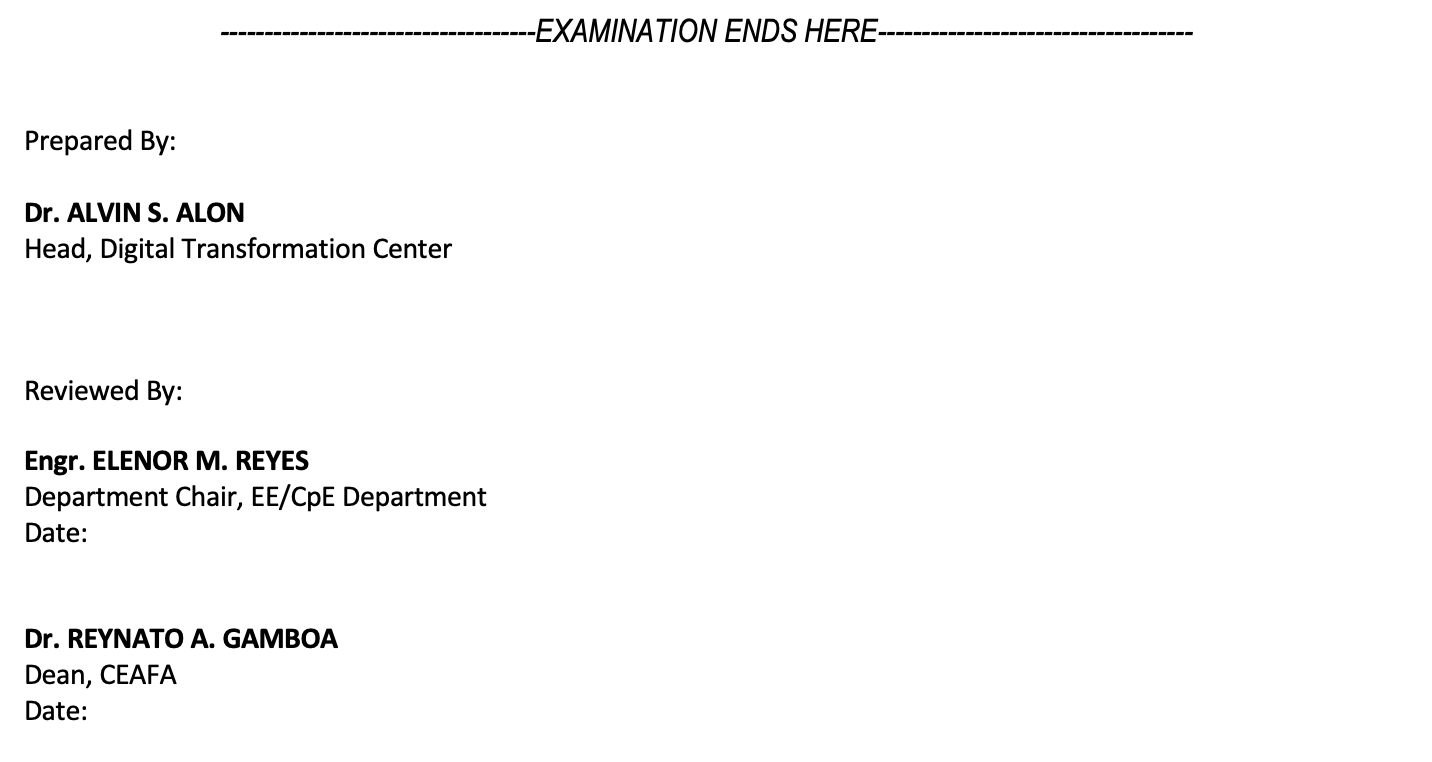